# Load Libs

In [41]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Load Data

In [42]:
uri = f"sqlite:///../data/uiassignmentdb.db"
engine = create_engine(uri)

In [43]:
with engine.connect() as conn: 
  train_query = 'SELECT * FROM train'
  train = pd.read_sql(train_query, conn)
  ideal_query = 'SELECT * FROM ideal'
  ideal = pd.read_sql(ideal_query, conn)

# Ideal

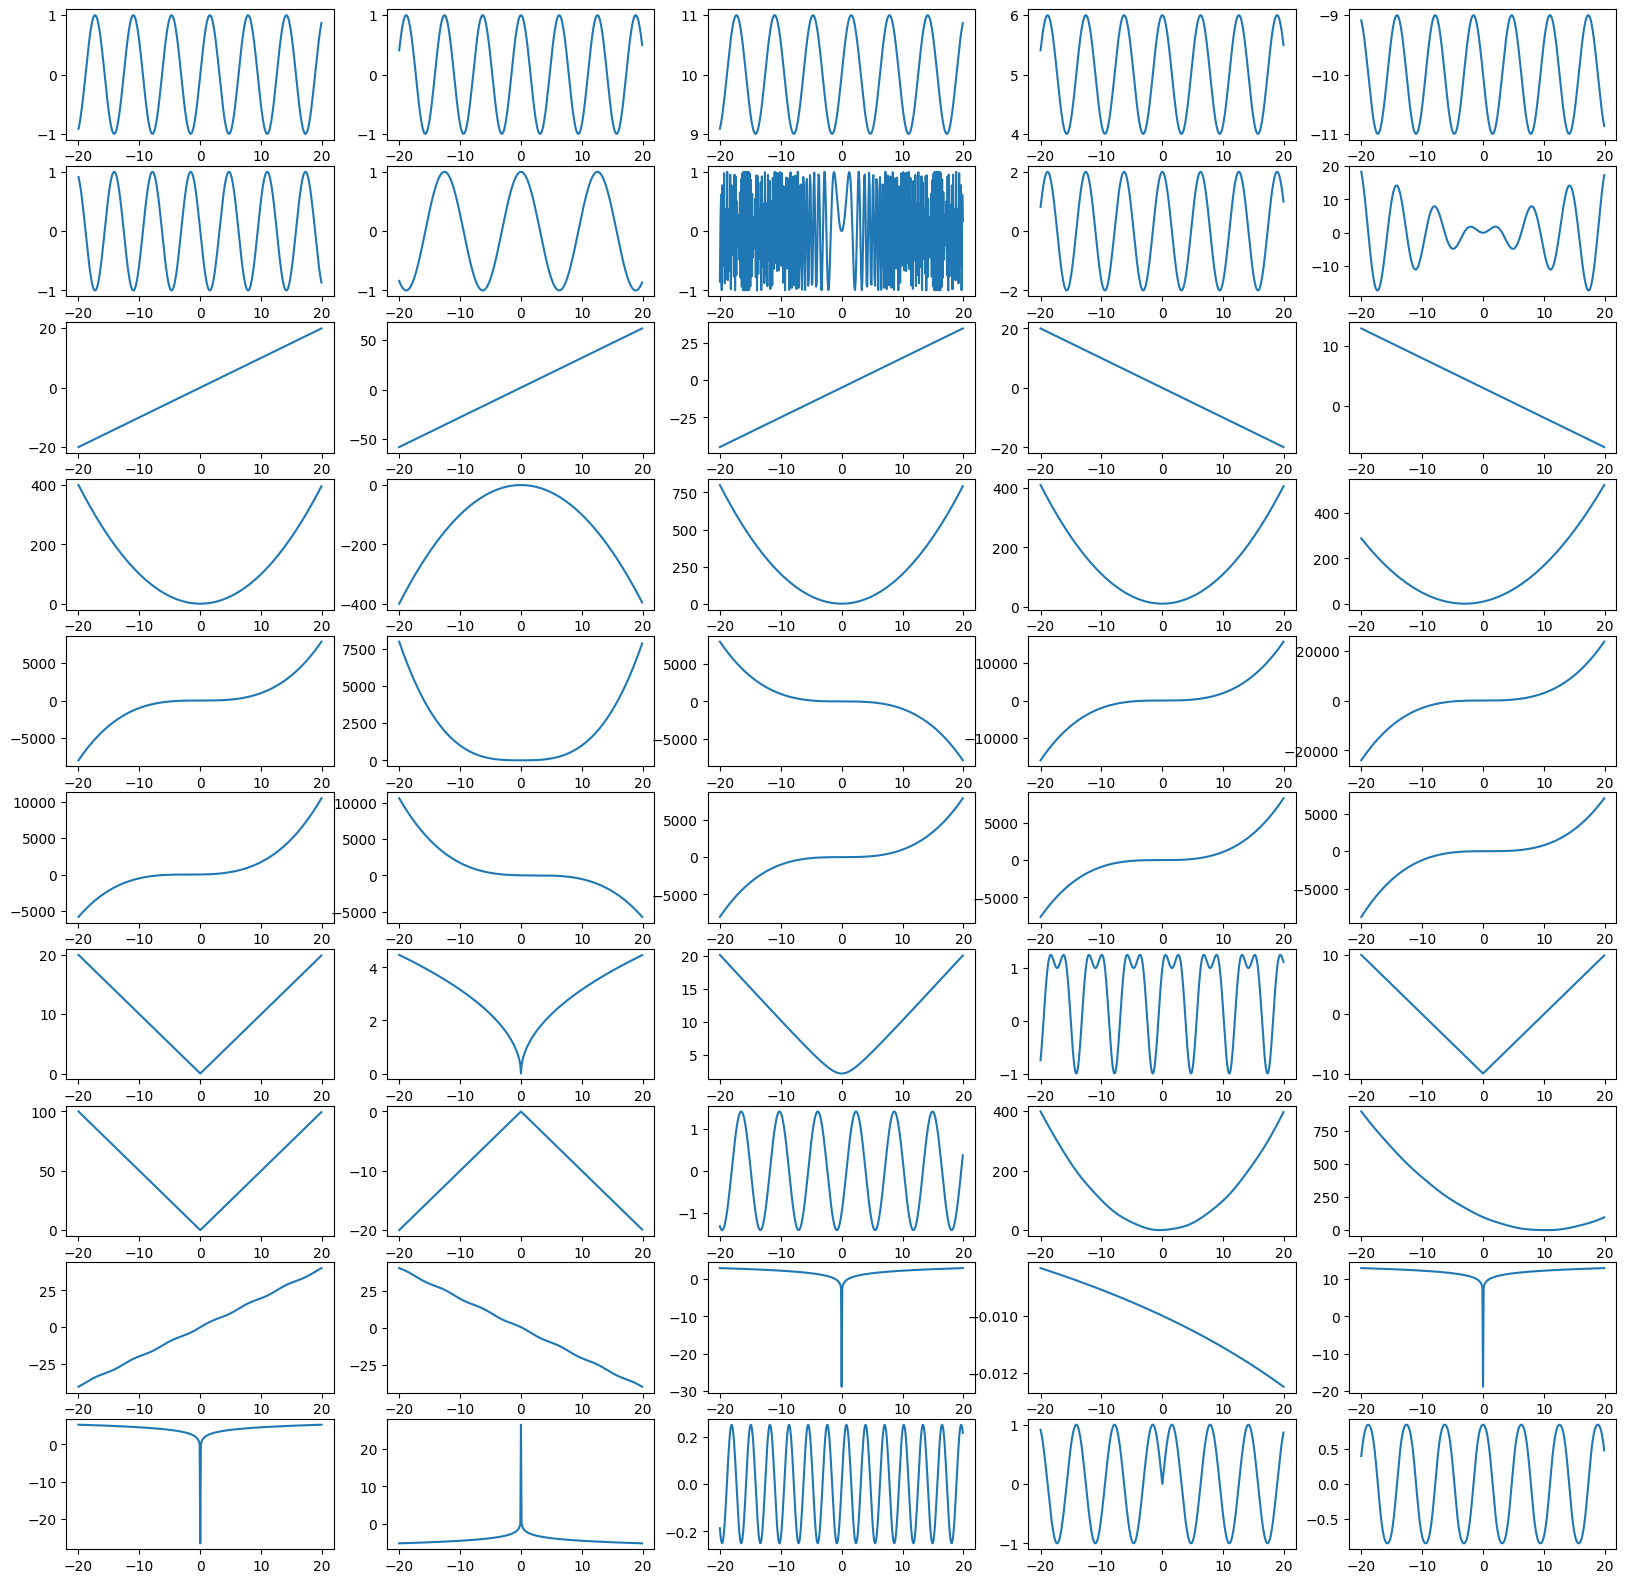

In [44]:
fix, axes = plt.subplots(10, 5, figsize=(20,20))

for i, ax in enumerate(axes.ravel()):
  y_axis = f'y{i + 1}'
  ax.plot(ideal['x'],ideal[y_axis])

In [45]:
def calculate_mse(y):
  fig, axes = plt.subplots(10, 5, figsize=(20,20))
  sum_squares_all = {'y_ideal':[],'sum_squared_error':[]}

  # Find best y
  for i, ax in enumerate(axes.ravel()):
    y_axis = f'y{i + 1}'
    ss = np.mean(np.power(np.subtract(ideal[y_axis],y),2))
    sum_squares_all['y_ideal'].append(y_axis)
    sum_squares_all['sum_squared_error'].append(ss)
    
  df_results = pd.DataFrame(sum_squares_all).set_index('y_ideal')
  best_result = df_results.idxmin().values

  for i, ax in enumerate(axes.ravel()):
    y_axis = f'y{i + 1}'
    ss = np.mean(np.power(np.subtract(ideal[y_axis],y),2))
    sum_squares_all['y_ideal'].append(y_axis)
    sum_squares_all['sum_squared_error'].append(ss)
    ax.plot(ideal['x'],ideal[y_axis], ls='--', alpha=0.5, label='ideal')
    ax.plot(ideal['x'],y, ls='-', alpha=0.5, label='train')
    ax.set_title(f'Scatter for {y_axis}, MSE:{np.round(ss,3)}')
    if best_result == y_axis:
      ax.set_facecolor('xkcd:mint green')
    ax.legend()
  
  plt.tight_layout()

  return df_results

# Y1

<Axes: xlabel='x', ylabel='y1'>

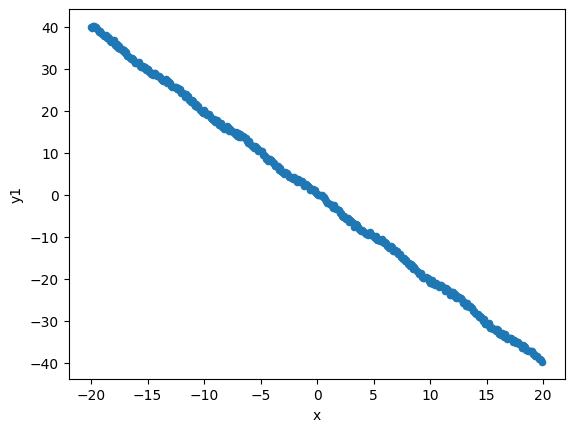

In [46]:
train.plot(x='x',y='y1', kind='scatter')

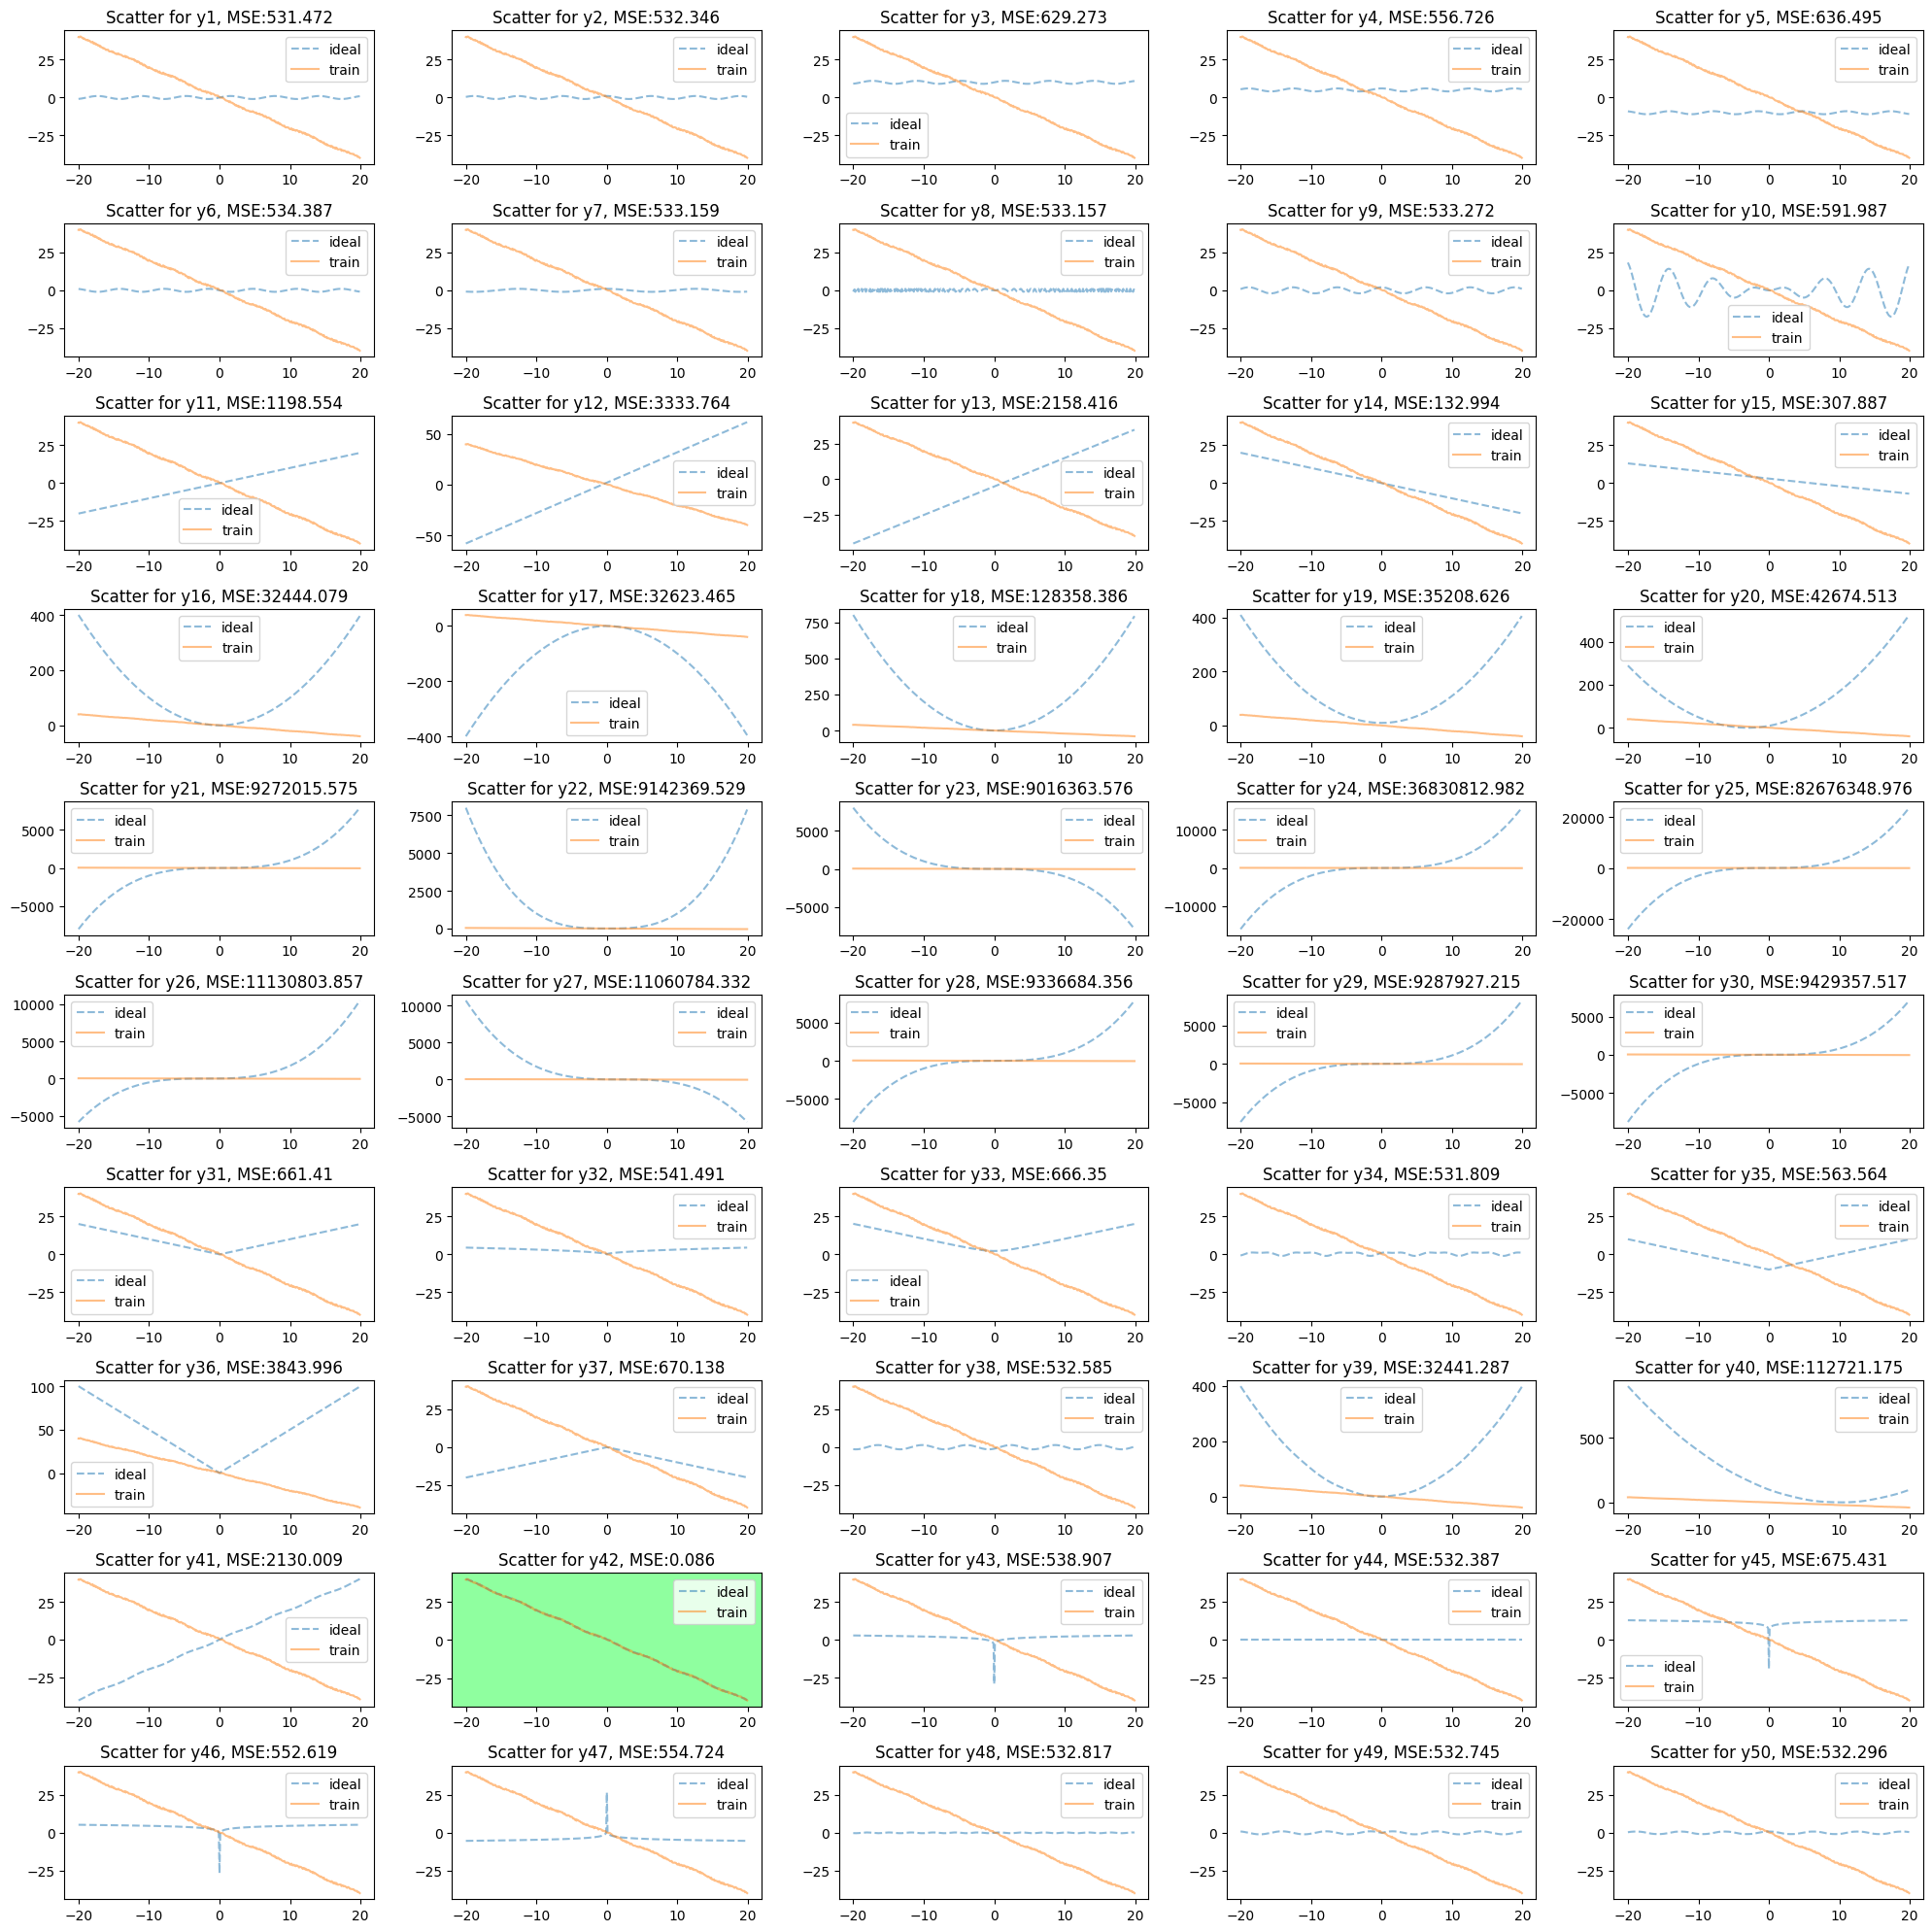

In [47]:
df_results = calculate_mse(train['y1'])

# Y2

<Axes: xlabel='x', ylabel='y2'>

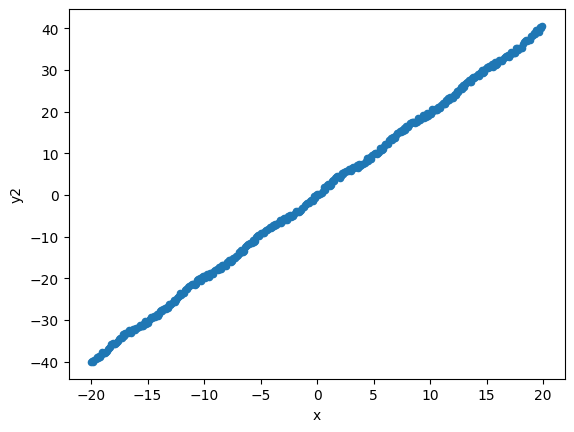

In [48]:
train.plot(x='x',y='y2', kind='scatter')

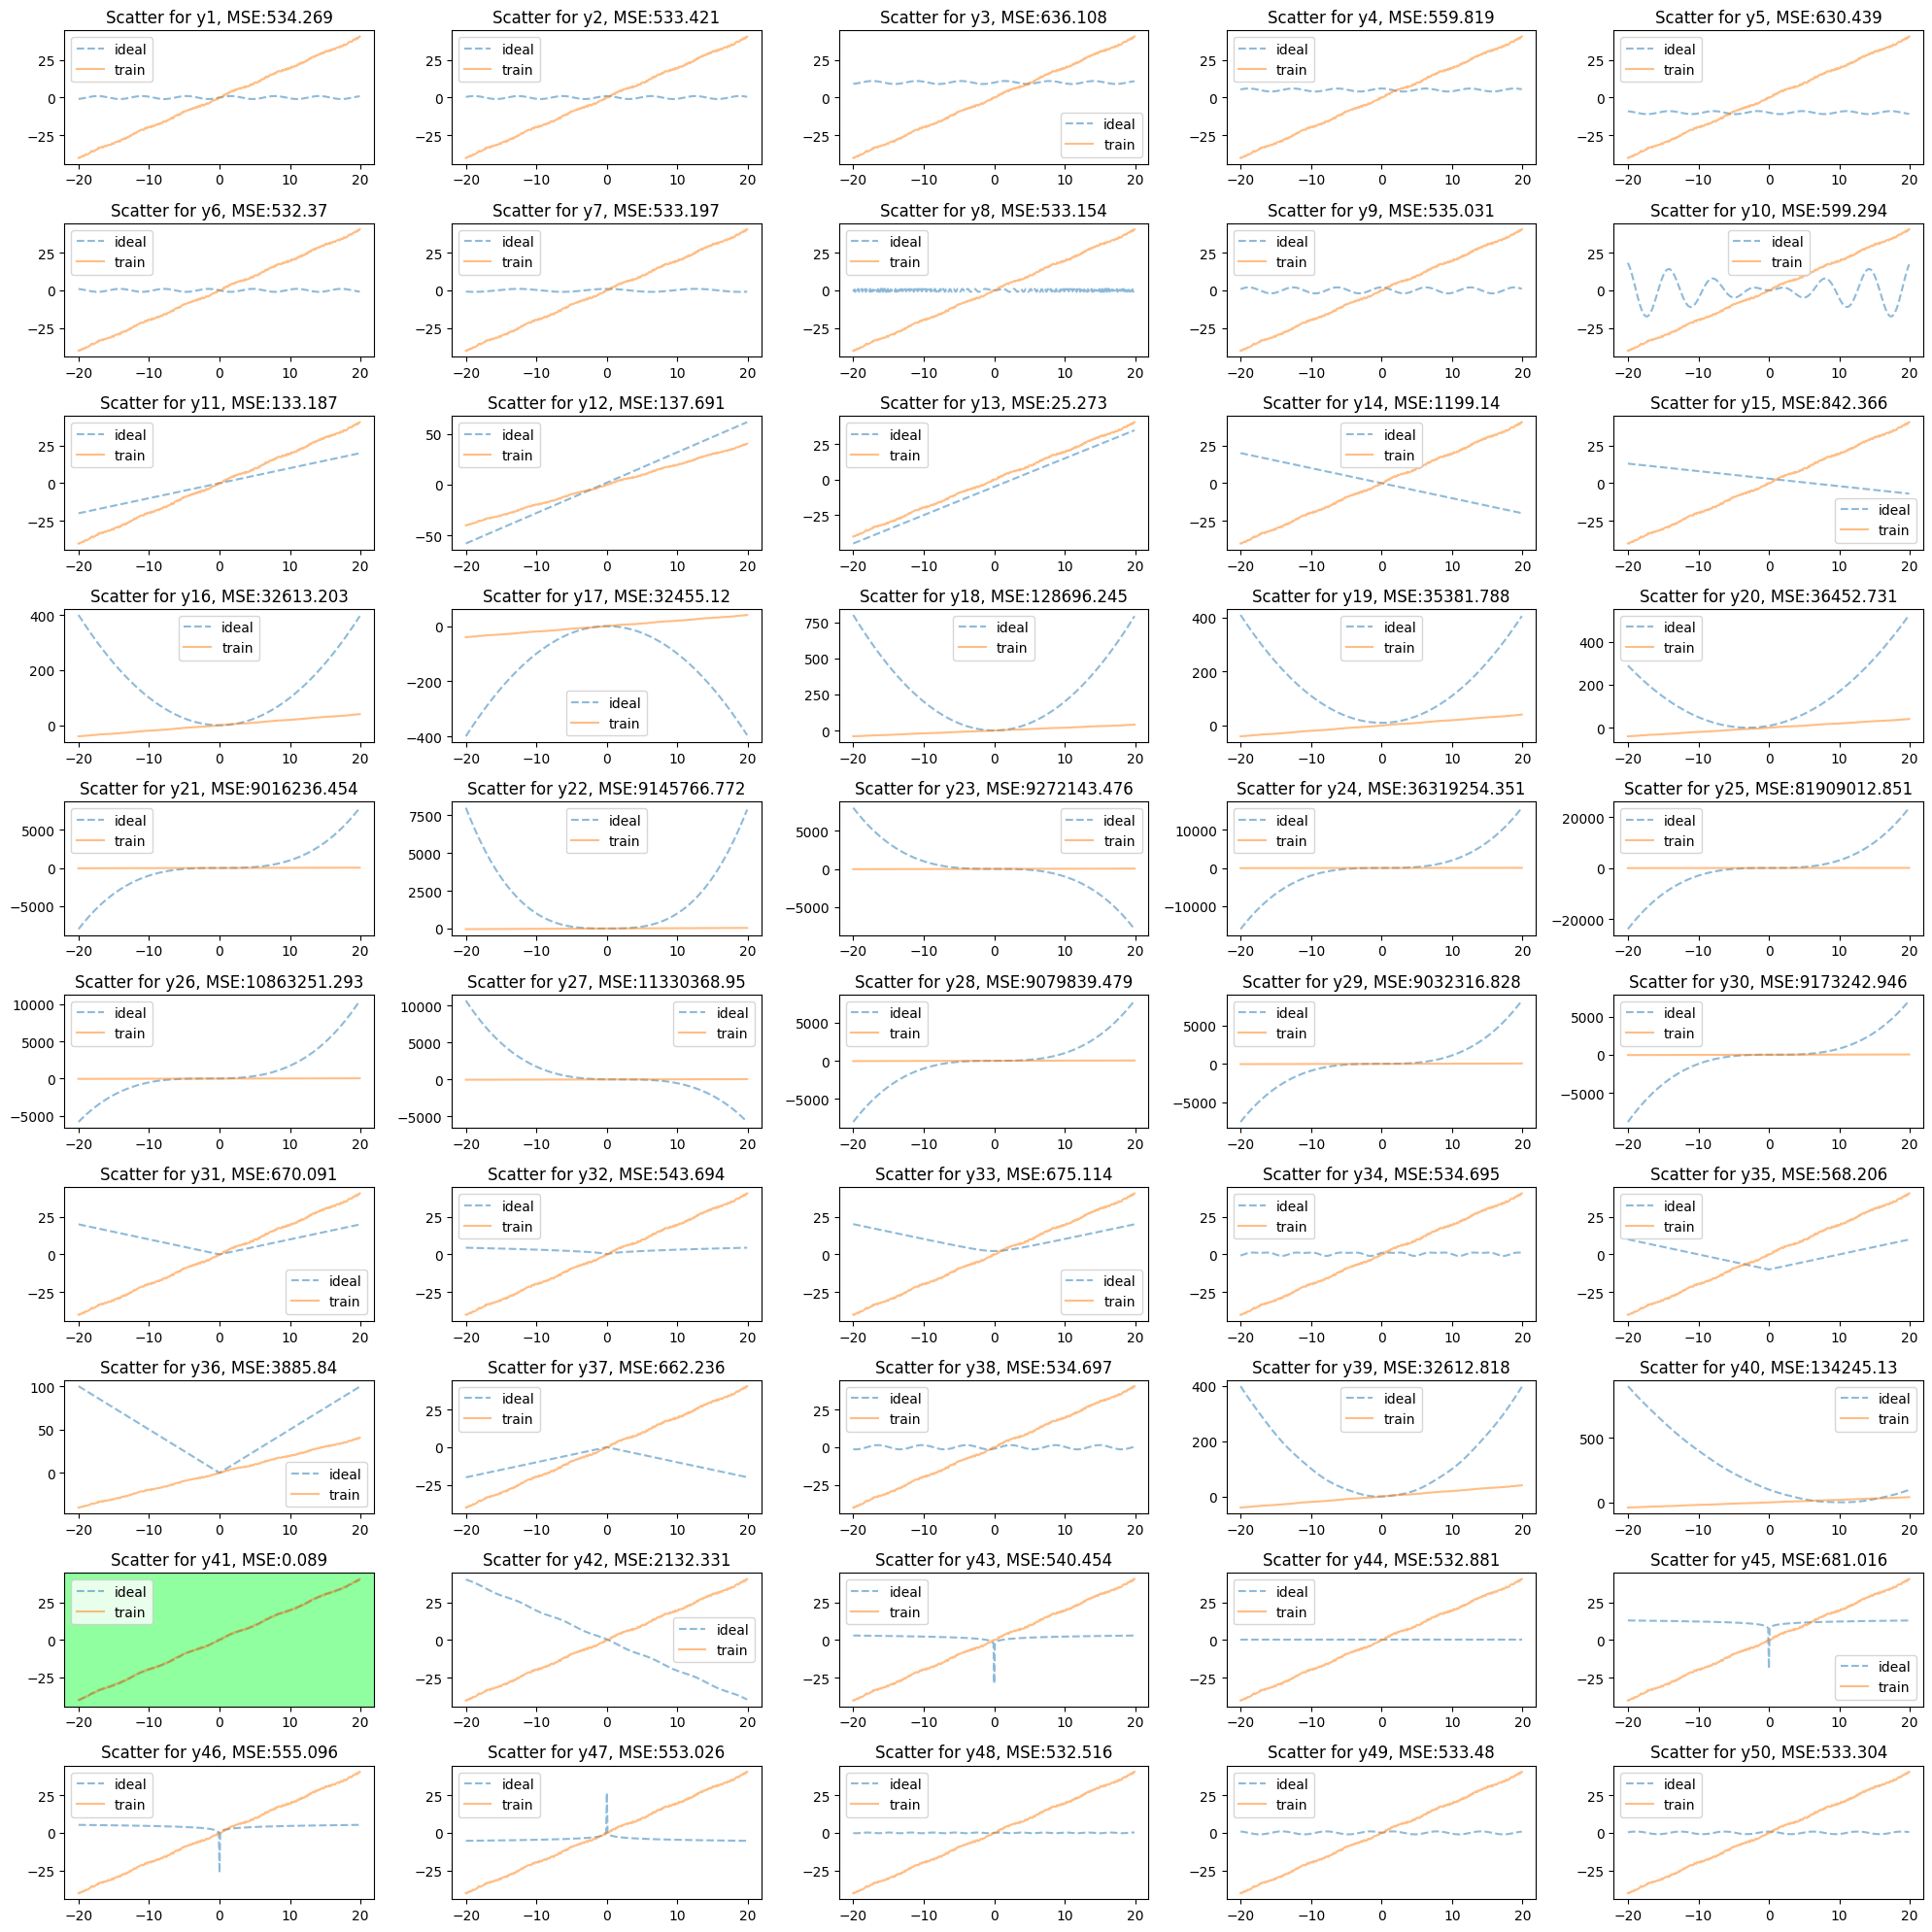

In [49]:
df_results = calculate_mse(train['y2'])

# Y3

<Axes: xlabel='x', ylabel='y3'>

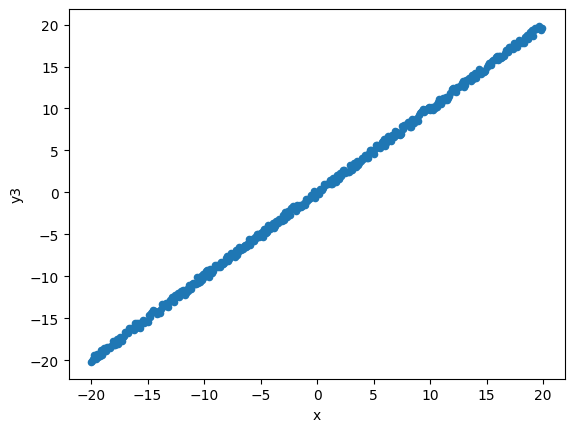

In [50]:
train.plot(x='x',y='y3', kind='scatter')

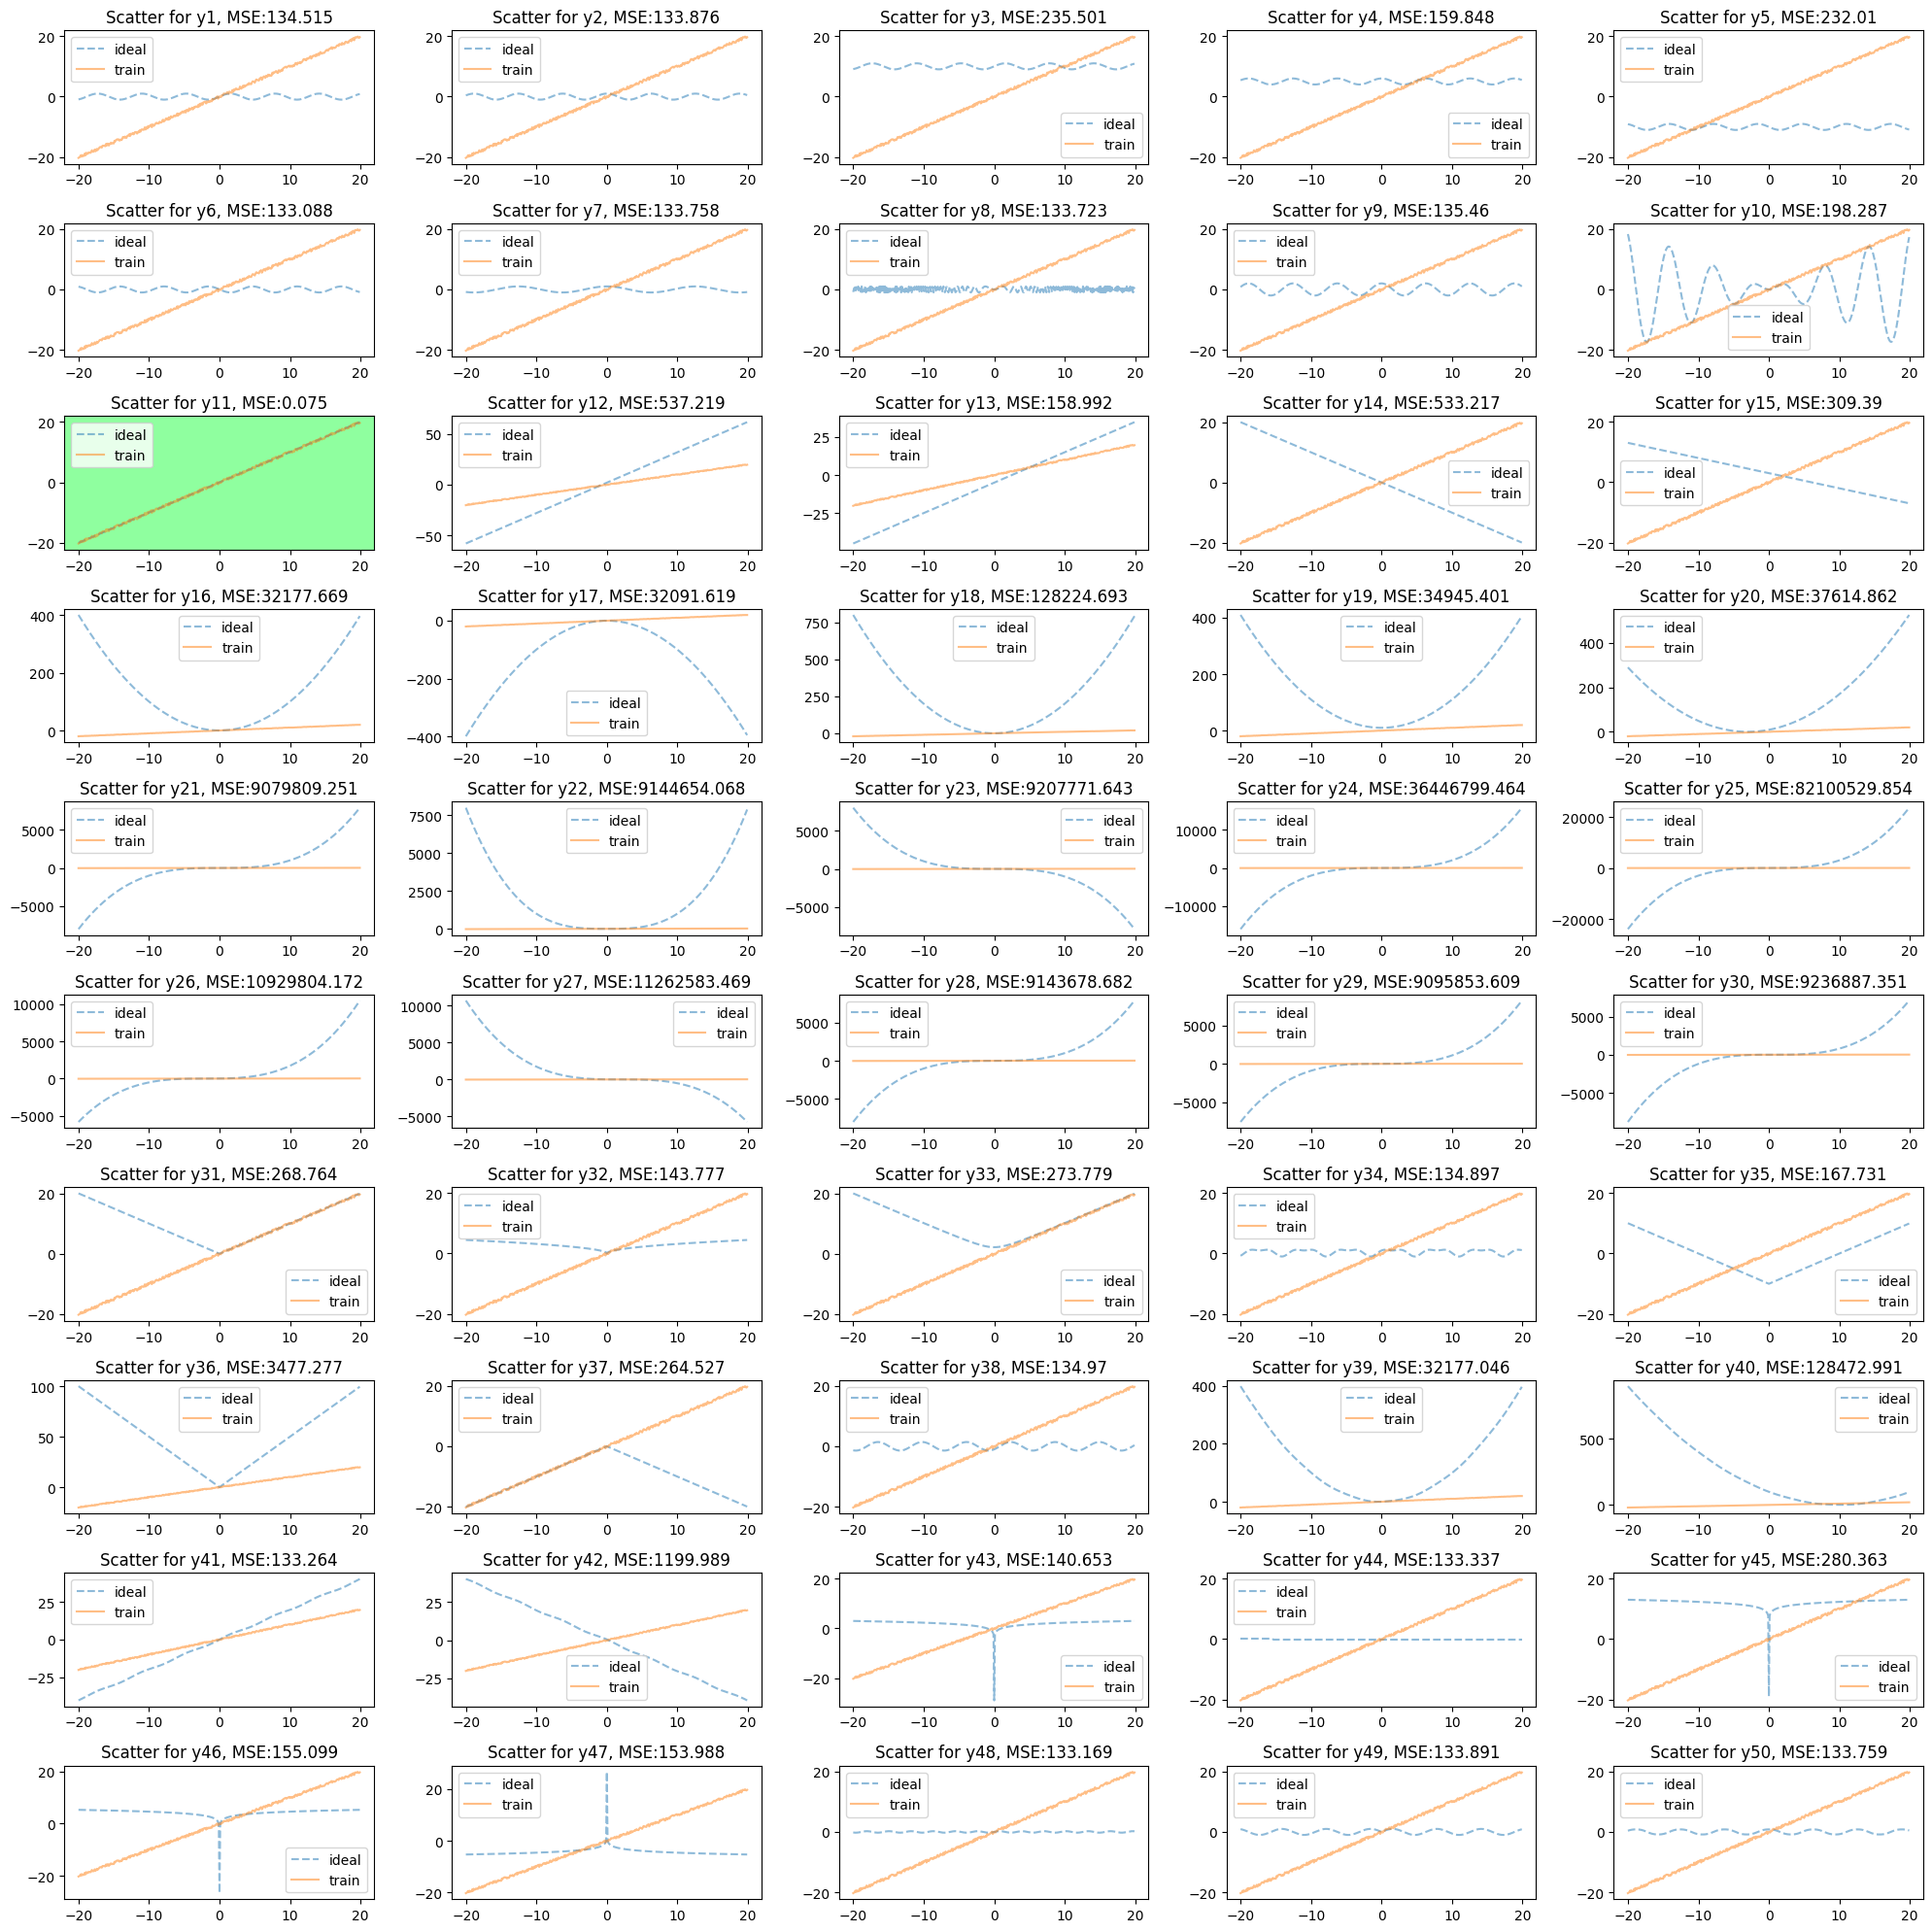

In [51]:
df_results = calculate_mse(train['y3'])

# Y4

<Axes: xlabel='x', ylabel='y4'>

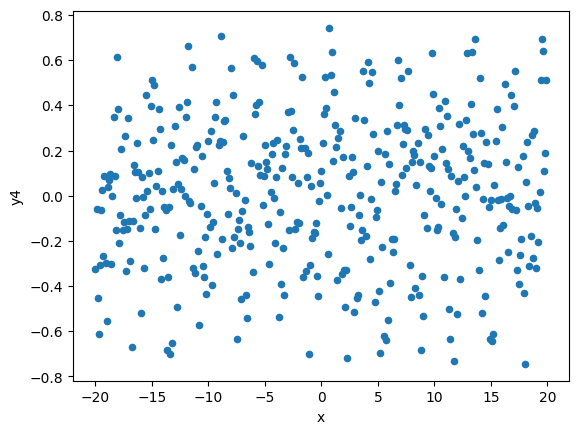

In [52]:
train.plot(x='x',y='y4', kind='scatter')

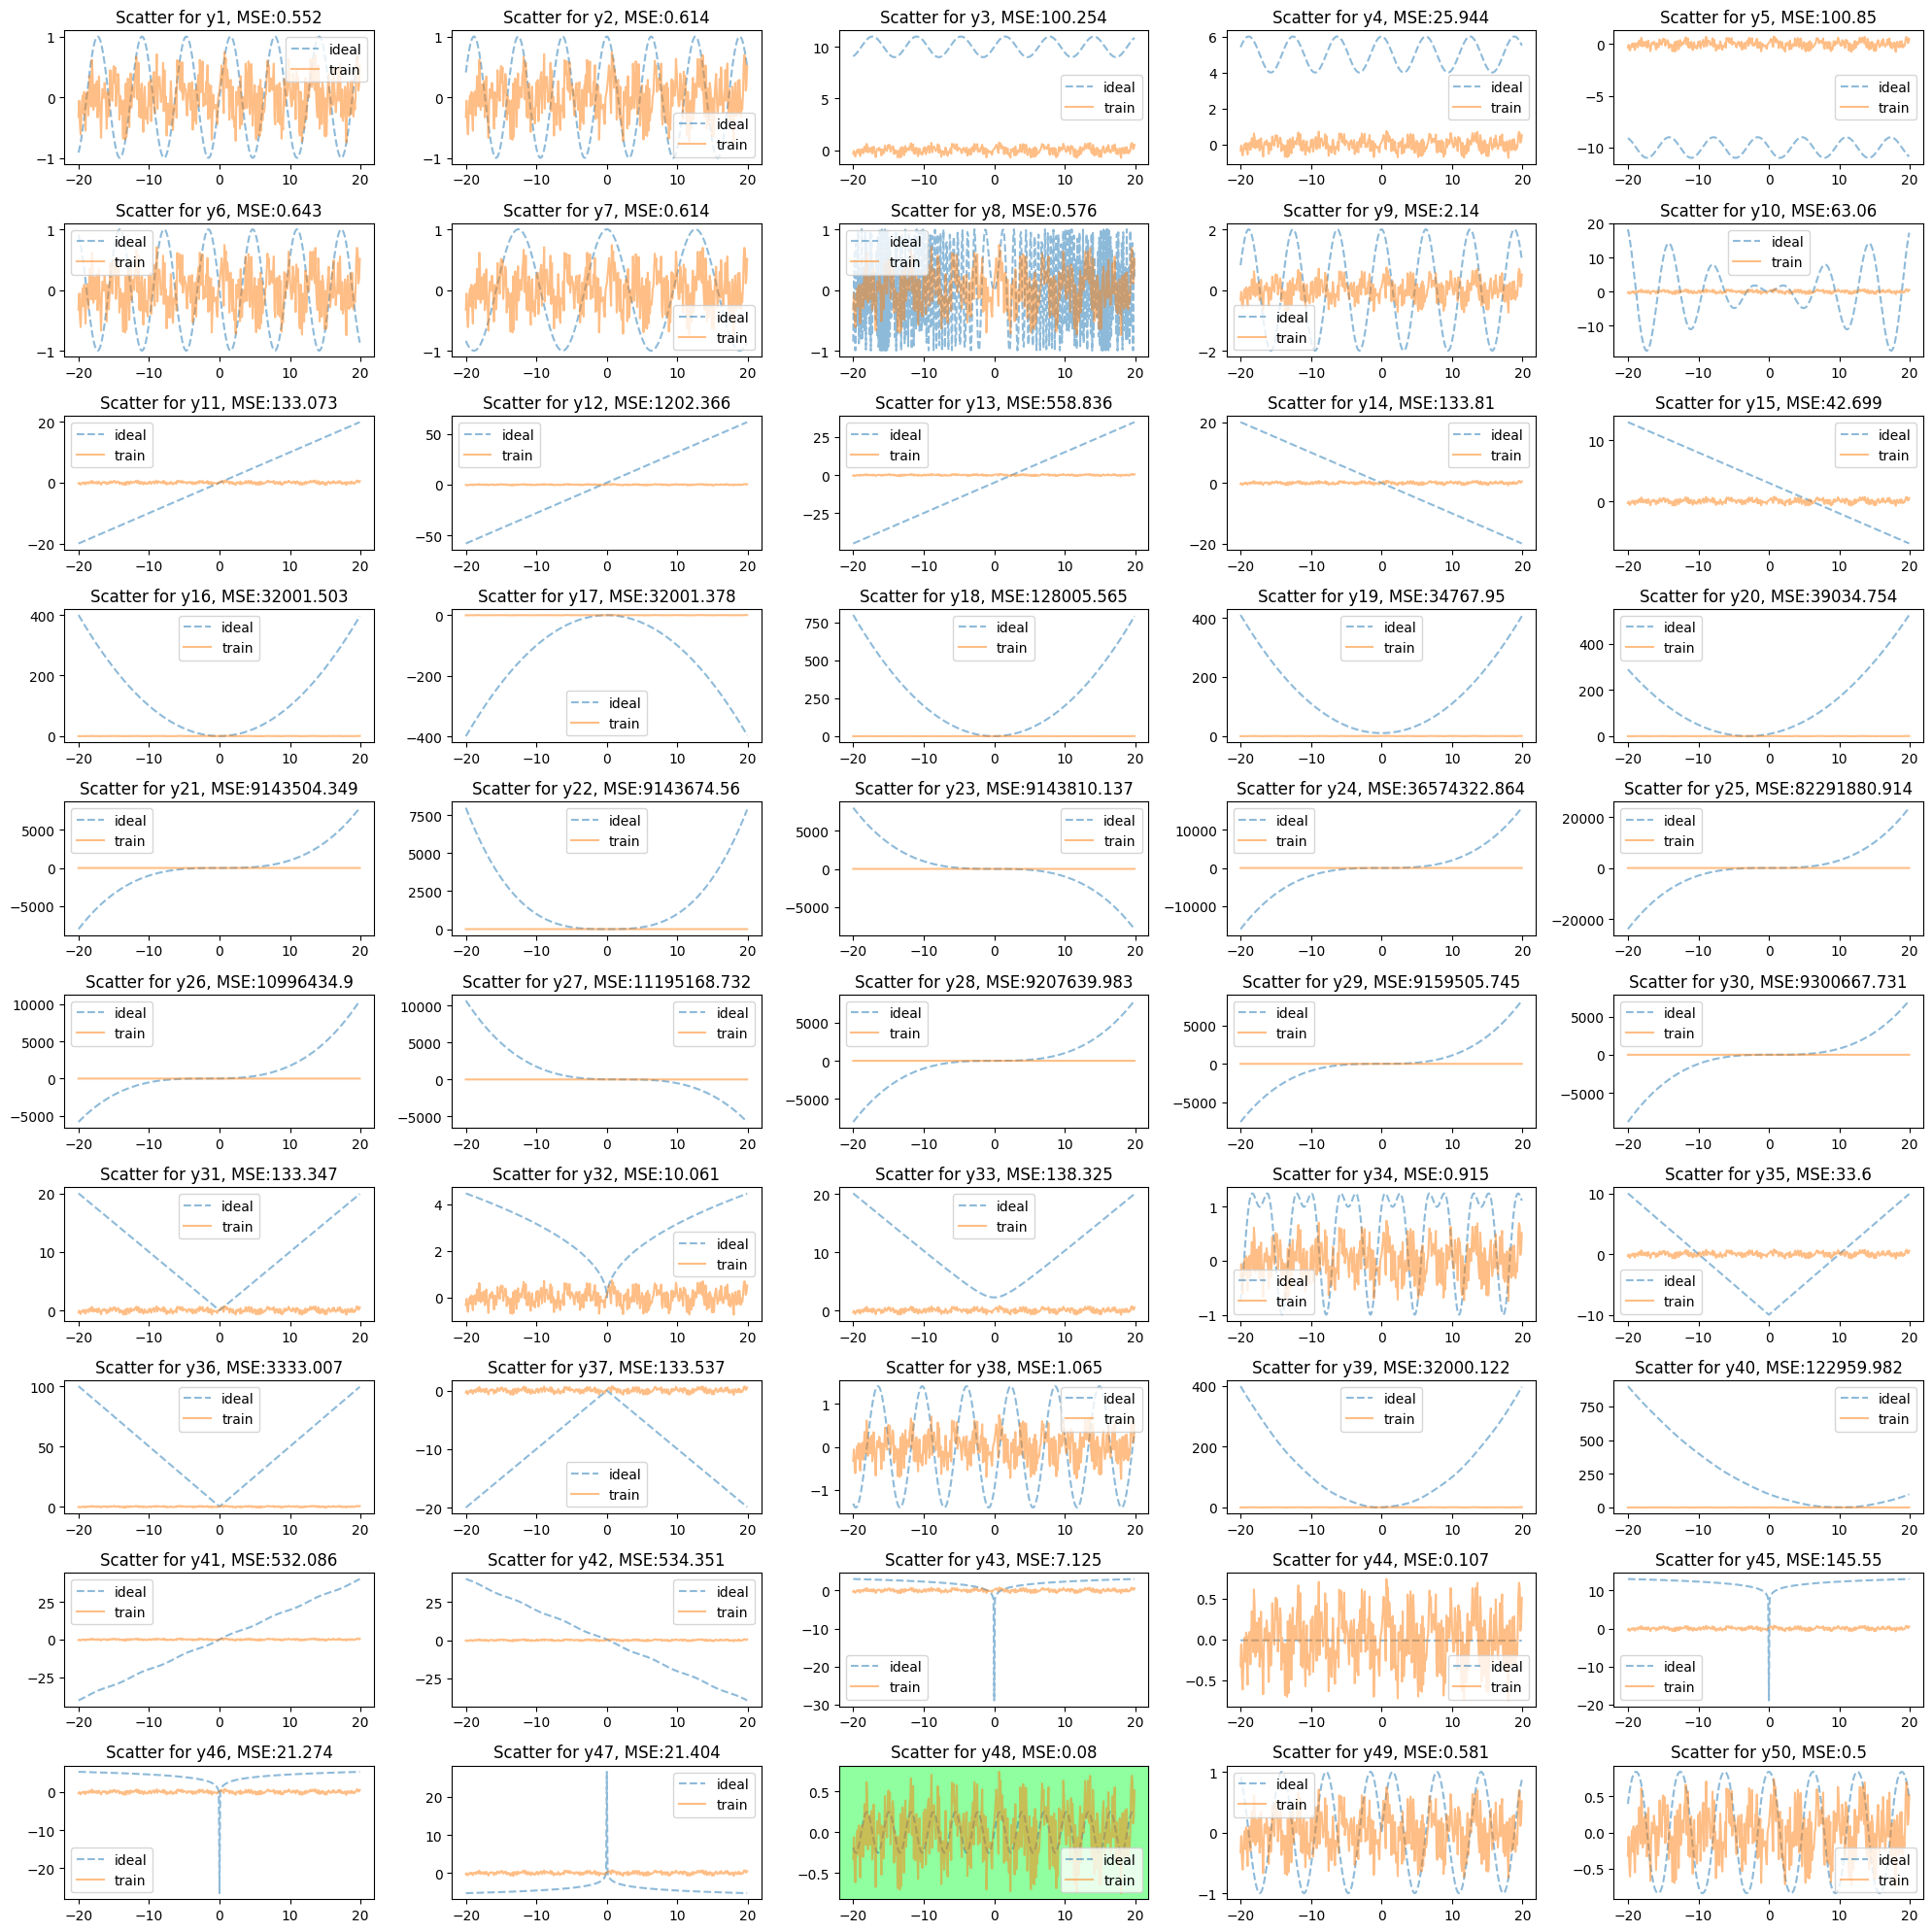

In [53]:
df_results = calculate_mse(train['y4'])